## Домашняя работа №1. Titanik
Дедлайн -- **11.10.18 23:59**

Выполненные задания можно либо присылать на почту gaintseva@phystech.edu, либо загружать в папку в своем репозитории на GitHub. Если загружаете в репозиторий, после загрузки выполненного дз делайте pull request в мой репозиторий или пишите мне в телеграме/на почту, что сделали домашнее задание.

----------------------

В этом задании мы с помощью изученных на семинаре библиотек поиграемся с датасетом Titanik для вот это соренования: https://www.kaggle.com/c/titanic

В этом задании мы не будем тренировать модели и предсказывать результаты, а только научимся работать с данными, обрабатывать из так, чтобы после на них можно было обучать модели машинного обучения. Это пригодится Вам на следующем занятии.

Данные скачивать с сайта не нужно, они уже лежат в папке рядом с этим ноутбуком.

Начем!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Часть 1. Смотрим на данные

#### Задание 1.1

С помощью библиоткеи pandas загрузите данные из файла train_titanik.csv в память и выведите первые 5 записей на экран:

In [2]:
data = pd.read_csv("train_titanik.csv")
test = pd.read_csv("test_titanik.csv")
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [4]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Как видно, в данных есть пропуски (NAN), некоторые данные категориальные (не числовые). Как мы помним с предыдущего занятия, чтобы на этих данных можно было обучать модели, нужно заполнить пропуски (избавиться от NaN) и перевести категориальные признаки в числовые. Этим мы и займемся.

#### Задание 1.2

Выделим из данных колонку с ответами (целевой переменной, Y) и в data оставим все остальные колонки

P.S. можно (и желательно) воспользоваться методом drop(): https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html:

In [5]:
y = data['Survived']
data = data.drop(['Survived'], axis=1)

In [6]:
data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Задание 1.3

Если хотите, можете посмотреть на связь разных признаков между собой на картинке. Заметьте, что пока мы не перевели категориальные признаки в числовые, мы можем смотреть только на числовые признаки. Давайте, например, посмотрим на связь признаков Age и SibSp 

(подсказка: для этого подойдет функция scatter(), пример ее применения можно найти из семинара или документации matplotlib. Не забудтьте раскрасить точки в 2 цвета в зависимости от значений целевой переменной):

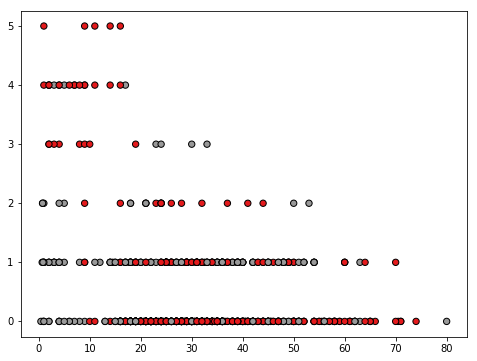

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(8, 6))
plt.scatter(data['Age'].values, data['SibSp'].values, c=y.values.astype(float),
           cmap=plt.cm.Set1, edgecolor='k', s=40)

### Часть 2: Заполнение NaN

Начнем с того, что заполним NaN в колонках, где они есть, какими-нибудь значениями. Для того, чтобы лучше понять, какие значения для пропусков выбрать, полезно посмотреть на данные с точки зрения каких-нибудь статистик (найти среднее по колонке, медиану, самое часто встречающееся значения и т.п.) 

#### 1.
Возраст человека может быть любым чтслом от 0 до \inf. Поэтому, кажется, что для колонки Age смотреть на количество строк с каждым отдельным значеним не имеет смысла. Больший смысл имеет найти значения статистик.

#### Задание 2.1: 
Для колонки Age найдите ее максимальное, минимальное, среднее значения и медиану, напечатайте результаты 

(подсказка: если поиск этих значений работает долго, вспомните, что для np.array() это все будет работать намного быстрее): 

In [8]:
print(data['Age'].mean())
print(data['Age'].min())
print(data['Age'].max())
print(data['Age'].median())

29.69911764705882
0.42
80.0
28.0


#### 2. 
Колонка Embarked, наоборот, содержит категориальный признак, который имеет мало разных значений в датасете. Поэтому для него как раз имеет смысл найти количества записей с каждым значением в датасете.

#### Задание 2.2: 
Для колонки Embarked для каждого значения в этой колонке найдите, сколько раз оно встречается. 

(подсказка: Это можно сделать руками, а можно с помощью метода .value_counts())

In [9]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### 3.
А вот что делать с колонкой Cabin, сразу непонятно. Она категориальная, и значений в ней много разных. 

#### Задание 2.3: 
Выведите описание столбца Cabin с помощью .describe()

In [10]:
data['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

#### 4.
Теперь, когда мы видим перед собой больше информации о колонках с NaN, пора эти NaN на что-нибудь заменить. На что -- решать Вам. Не обязательно при этом использовать те величины, которые мы находили в пунктах 2.1 - 2.3.

In [13]:
data = data.append(test)
data.columns[data.isna().any()].tolist()

['Age', 'Fare', 'Cabin', 'Embarked']

#### Задание 2.4: 
Заполните пропуски в data отдельно для Age, Embarked и Cabin. Объясните, почему Вы решили заполнить их именно так.

P.S. NaN удобно заменять с помощью метода .fillna() (о нем было на семинаре, можно посмотреть в ноутбуке numpy.ipynb). Обратите внимание, что метод НЕ изменяет объект, к которому был применен, а возвращает новый.

In [14]:
#Полгаю, что поставить 0 будет удобнее, так как по такому значению сразу ясно, что это пропуск
#print(data[data['Age'] == 0.0]['Age'])
data['Age'] = data['Age'].fillna(0)
data['Fare'] = data['Fare'].fillna(0)

In [15]:
#аналогично
data['Embarked'] = data['Embarked'].fillna('')
data['Cabin'] = data['Cabin'].fillna('')

Все, теперь в data не должно быть NaN. Код в ячейке ниже это проверяет. Если он выдал ошибку, значит, Вы не избавились от всех NaN в данных

In [16]:
assert not data.isnull().values.any()

### Часть 3. Перевод категориальных признаков в числа

Как мы помним с лекции, модели (за редким исключением) умеют работать только с числовыми признаками. Поэтому все нечисловые признаки придется превратить в числовые. Этим мы сейчас и займемся.

#### Задание 3.1

Для начала давайте подумаем, что делать с колонкой Name. В ней каждое значение уникальное, и если превращать эти значения в числа, каждому человеку мы поставим в соответствие уникальное число. То есть, получится колонка такая же, как PassengerId. Наверное, нам это не нужно. Поэтому давайте просто удалим эту колонку:

P.S. можно (и желательно) воспользоваться методом drop(): https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html:

In [17]:
data = data.drop(['Name'], axis=1)

Посмотрим опять, какие данные у нас остались и что пока получилось:

In [18]:
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,male,35.0,0,0,373450,8.0500,,S


In [19]:
print(data.columns)
print(data.dtypes)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [20]:
data["Sex"].dtypes == object

True

#### Задание 3.2
Напишите функцию, которая будет превращать колонку с категориальными признаками в колонку с числовыми признаками:

(подсказка: будет работать быстрее, если работать не с pd.DataFrame, а перевести в np.array())

In [21]:
def categorical_to_numeric(column):
    """
    column: колонка значений типа pd.DataFrame
    функция возвращает np.array() с новыми числовыми значениями этой колонки
    """
    unique_values = column.unique()
    
    d = {}
    
    for i in range(0, len(unique_values)):
        d[unique_values[i]] = i
    
    print(d)

    return column.map(d)

Переведем колонки и категориальными признаками в числовые с помощью только что написанной Вами функции:

In [22]:
for column in data.columns:
    if data[column].dtypes == object:
        data[column] = categorical_to_numeric(data[column])

{'male': 0, 'female': 1}
{'A/5 21171': 0, 'PC 17599': 1, 'STON/O2. 3101282': 2, '113803': 3, '373450': 4, '330877': 5, '17463': 6, '349909': 7, '347742': 8, '237736': 9, 'PP 9549': 10, '113783': 11, 'A/5. 2151': 12, '347082': 13, '350406': 14, '248706': 15, '382652': 16, '244373': 17, '345763': 18, '2649': 19, '239865': 20, '248698': 21, '330923': 22, '113788': 23, '347077': 24, '2631': 25, '19950': 26, '330959': 27, '349216': 28, 'PC 17601': 29, 'PC 17569': 30, '335677': 31, 'C.A. 24579': 32, 'PC 17604': 33, '113789': 34, '2677': 35, 'A./5. 2152': 36, '345764': 37, '2651': 38, '7546': 39, '11668': 40, '349253': 41, 'SC/Paris 2123': 42, '330958': 43, 'S.C./A.4. 23567': 44, '370371': 45, '14311': 46, '2662': 47, '349237': 48, '3101295': 49, 'A/4. 39886': 50, 'PC 17572': 51, '2926': 52, '113509': 53, '19947': 54, 'C.A. 31026': 55, '2697': 56, 'C.A. 34651': 57, 'CA 2144': 58, '2669': 59, '113572': 60, '36973': 61, '347088': 62, 'PC 17605': 63, '2661': 64, 'C.A. 29395': 65, 'S.P. 3464': 66

Теперь в данных в колонках должны быть только чиселки. Код ниже это проверяет:

In [23]:
assert object not in list(data.dtypes), "Ошибка: у Вас в данных все еще есть нечисловые значения!"
assert sorted(list(data.columns)) == sorted(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']), "Ошибка: у Вас в данных не все нужные колонки, Вы где-то что-то потеряли =()"

Ну и посмотрим на получившийся pd.DataFrame:

In [24]:
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,0,22.0,1,0,0,7.2500,0,0
1,2,1,1,38.0,1,0,1,71.2833,1,1
2,3,3,1,26.0,0,0,2,7.9250,0,0
3,4,1,1,35.0,1,0,3,53.1000,2,0
4,5,3,0,35.0,0,0,4,8.0500,0,0


In [25]:
data.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,0.355997,23.877517,0.498854,0.385027,405.414057,33.270043,18.577540,0.398778
std,378.020061,0.837836,0.478997,17.590845,1.041658,0.865560,267.867110,51.747063,42.662277,0.661200
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,0.000000,7.000000,0.000000,0.000000,166.000000,7.895800,0.000000,0.000000
50%,655.000000,3.000000,0.000000,24.000000,0.000000,0.000000,373.000000,14.454200,0.000000,0.000000
75%,982.000000,3.000000,1.000000,35.000000,1.000000,0.000000,627.000000,31.275000,0.000000,1.000000
max,1309.000000,3.000000,1.000000,80.000000,8.000000,9.000000,928.000000,512.329200,186.000000,3.000000


Все, теперь необходимая предобработка данных перед тем, как обучать модель, закончена. Хотя это не значит, что эта предобработка была достаточной. На следующем занятии мы попробуем сделать предобработку еще лучше.

И теперь можно с помощью plt.scatter из задания 1.3 выводить на экран зависимости всех столбцов, а не только тех, которые изначально были числовыми. 

In [26]:
data = data.drop(['PassengerId'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008B028D0>,
      dtype=object)

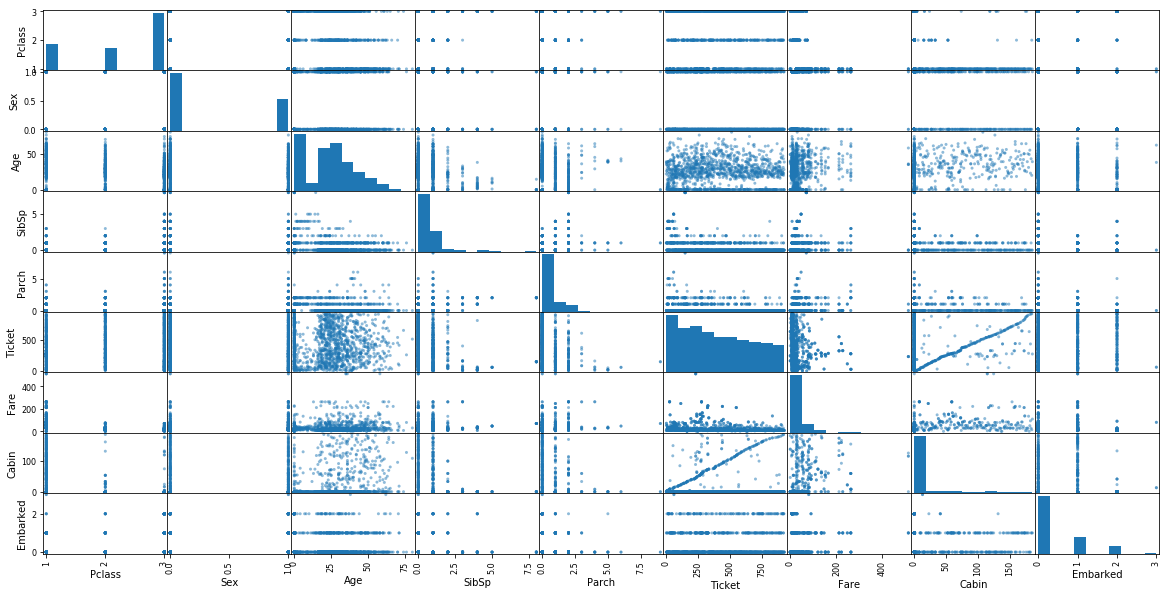

In [27]:
from pandas.plotting import scatter_matrix

attributes = data.columns
scatter_matrix(data, figsize=(20, 10))

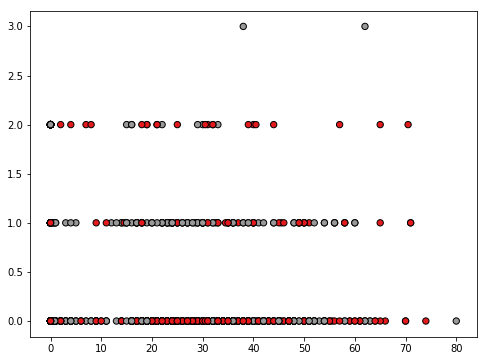

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(8, 6))
plt.scatter(data[:891]['Age'].values, data[:891]['Embarked'].values, c=y.values.astype(float),
           cmap=plt.cm.Set1, edgecolor='k', s=40)

-------------------------------

#### Задание*

Для тех, кто на прошлом занятии игрался с knn.ipynb, предлагается применить knn к полученным данным, а потом получить ответы на данные из test_titakin.csv и загрузить в соревнование: https://www.kaggle.com/c/titanic. Какой результат получился и при каких k?

In [32]:
data.count()

Pclass      1309
Sex         1309
Age         1309
SibSp       1309
Parch       1309
Ticket      1309
Fare        1309
Cabin       1309
Embarked    1309
dtype: int64

In [34]:
test_ids = test['PassengerId']

In [36]:
test = data[1309 - 418:]

In [37]:
data = data[:1309 - 418]

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

results_cv = []
for n_neighbors in range(1, 30):
    results_cv.append(np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=n_neighbors), data, y.ravel(), cv=4)))

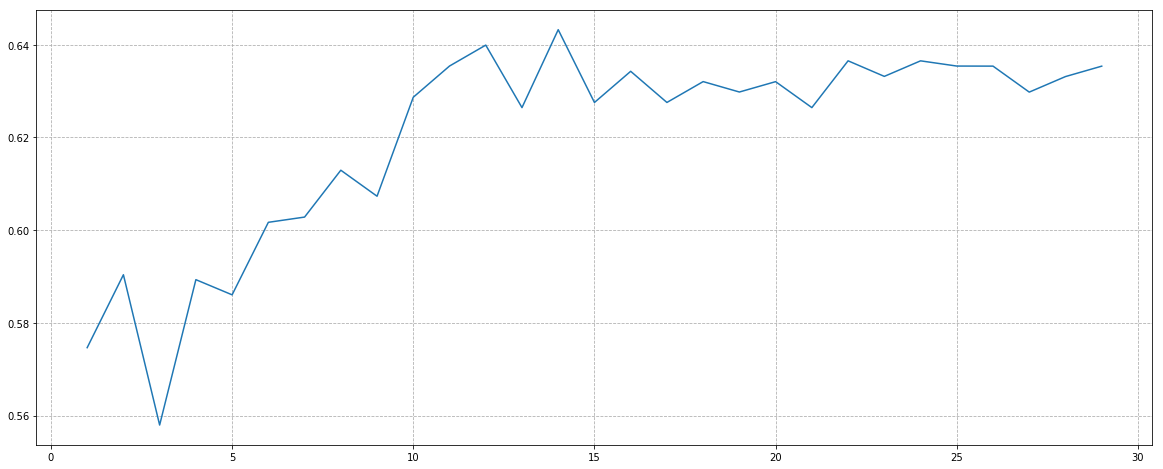

In [39]:
plt.figure(figsize=(20, 8))
plt.plot(list(range(1, 30)), results_cv)
plt.grid(ls='--') 
plt.show()

In [ ]:
Выглядит так, как будто бы 14 соседей лучше всего.

In [40]:
knn = KNeighborsClassifier(n_neighbors=14).fit(data, y.ravel())

In [41]:
res = pd.DataFrame(knn.predict(test), columns=['Survived'])

In [42]:
res['PassengerId'] = test_ids
res.head()

,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,0,896


In [44]:
res.to_csv("res.csv", index=False)

Score на Kaggle 0.67464, 9992 место.